# Chapter-1 Introduction to semantic segmentation

- Topic - What is segmentation?
- Topic - Difference between thing and stuff.
- Topic - Different types of segmentation

# Topic1
## 1.1 - What is segmentation ?
One of the primary goals of computer vision is the understanding of visual scenes. Scene understanding involves numerous tasks including recognizing what objects are present, localizing the objects in 2D and 3D,determining the objects and scene’s attributes, characterizing relationships between objects and providing a semantic description of the scene. Inorder to do these we need to understand what every pixel in a image represents and so **Image segmentation** is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics. For example in the medical industry, while dealing with cancer cells detection, it is very important for a Radiologist to segment each and every pixel of CT-scan as cancer or non-cancer cell. This will allow the doctor to assess the damage and suggest a medication based on that. For we as a data scientist our fundamental duty is to separate out the cancerous cells(1) from the background (0). This is an image-segmentation problem. 

## 1.2 How is image segmenatation different from image classification?
As shown in the images below, In image classification, we assign a label (single classification problem) or a set of labels (multi-class classification) to each image. In Image segmentation, we assign a label to each and every pixel of the image. For example, the image shown below contains multiple labels, the image classification outputs 3 lables called surfboard, human and water. It doesn't tell where water, human or surf board is located inside the image. In image segmentation, if the image height and width is (400x600) we get an output of same size, with each pixel contain the label index of the class. In this case we have water (0), surf_board(1) and humans(2). This not only tells what objects are present, it also tells where the objects are present inside the image and how much space do they occupy. This level information will further help us in scene parasing and understanding.

![surf_class](../images/surf_class.png)
![surf_seg](../images/surf_seg.png)

## 1.3 Use cases 
Image segmentation is extensively used in several industries. Some of the domains include.  

- In the medical domain, We can see Companies like [Sigtuple](https://sigtuple.com/#s-solutions), [Qure.ai](http://qure.ai), [PathAI](https://www.pathai.com/) heavily using image segmenation in their solutions.

- In GeoSensing – For land usage, Land cover information is important for various applications, such as monitoring areas of deforestation and urbanization.To recognize the type of land cover (e.g., areas of urban, agriculture, water, etc.) for each pixel on a satellite image, land cover classification can be regarded as a multi-class semantic segmentation task. Road and building segmentation is also an important research topic for traffic management, city planning, and road monitoring. This satellite data is also used by traders to get better insights on the business. For example, a coal trader may want to know when demand is going to exceed supply, driving up prices. Satellite images could measure the piles of coal outside power plants to see when they’re getting low and need to be refilled. They can count trains and track ocean tankers carrying supplies. They can measure ground levels, pile heights and truck activities at mines to deduce production. Now given a satellite image, if we can segment the coal portion, or its shadow from other parts of the image, we can convert the unstructed image data to structured (%of space coal occupied) data.

Likewise segmentation has its inroads into many industries.

## Topic-2 Thing and Stuff Objects 
In the vision community, we classify objects as stuff and things. 

![thing-stuff-image](../images/thing_stuff_img.png)

### 2.1 Thing
Things are objects with a specific size and shape, that are often composed of parts.
For examples, persons, cars, bikes etc belong to thing category. In the above example shown, human and aircraft are considered as thing objects.

### 2.2 stuff 
Stuff classes are background materials that are defined by homogeneous or repetitive patterns of fine-scale properties, but have no specific or distinctive spatial extent or shape. In the above example shown, sky and trees are considered as stuff objects.  

Why the focus on stuff? Stuff covers about 66% of the pixels in COCO (Dataset which we will use later). It allows us to explain important aspects of an image, including scene type; which thing classes are likely to be present and their location; as well as geometric properties of the scene.  

### 2.3 Defining  things  and  stuff.
The  literature  provides  definitions  for  several  aspects  of  stuff  and  things,  including:    

- **Shape:** Things have characteristic shapes (car,cat,phone), whereas stuff is amorphous (sky, grass, water)
- **Size:** Things occur at characteristic sizes with little variance, whereas stuff regions are highly variable in size.
- **Parts:** Thing classes have identifiable parts, where as stuff classes do not (e.g. a piece of grass is still grass,but a wheel is not a car).   
- **Instances:**  Stuff classes are typically not countable and have no clearly  defined  instances. 
- **Texture:** Stuff classes are typically highly textured.  

Finally, a few classes can be interpreted as both stuff and things, depending on the image conditions (e.g. a large number of people is sometimes considered a crowd). Several works have shown that different techniques are required for the detection of stuff and things. Moreover, several works have shown that stuff is a useful contextual cue to detect things and vice versa.

Based on detection of Thing and stuff in an image at various levels, The image segmentation tasks in vision communinty are broadly classified into three categories. They are called, 
- Semantic segmentation
- Instance segmentation
- Panoptic segmentation

## Quiz
1) Which of the following label names belong to stuff ? (One or more answers possible)  
A) Road  
B) Sky  
C) playingfield  
D) Football  


Ans) A, B, C (Road, SKY and Playingfield is not countable, They donot have definative shape and size, where as footballs can be counted and are round in shape and have definative size).  

2) Which of the following label names belong to thing? (One or more answers possible)  
A) River  
B) Kite  
C) Clouds  
D) Surf board   

Ans) B, D (Both Kite and Surf board can be counted, have definative shape and size)  

## Topic-3 Different types of segmentation
As discussed above, Image segmentation tasks in vision community is broadly classified into three categories. They are called
- semantic segmentation
- instance segmentation
- panoptic segmentation

## 3.1 Semantic Segmentation
Studying stuff is most commonly formulated as a task known as semantic segmentation, As stuff is amorphous and uncountable, this task is defined as simply assigning a class label to each pixel in an image. Some of the applications including
- estimating cancerous cells volume and location in a lung CT scan for automatic diagnosis of Cancer.
- Automatically and accurately identify if a subsurface target is salt or not. [link](https://www.kaggle.com/c/tgs-salt-identification-challenge)
- The dataset usually contains an input image (RGB mostly) and the output contains a class number for each pixel. In the below image we can see that each stuff and thing object is given a different pixel value. Note: Frizbee, bench and humans though appearing black, were actually given different pixel values, this can be seen in the below bar chart.

input image             |  semantic image
:-------------------------:|:-------------------------:
![input image](segmentation/input_image.png)  |  ![semantic image](segmentation/semantic.png)

### How to count the number of pixels each class is occupying? We will be using **labels.txt** for this excerise

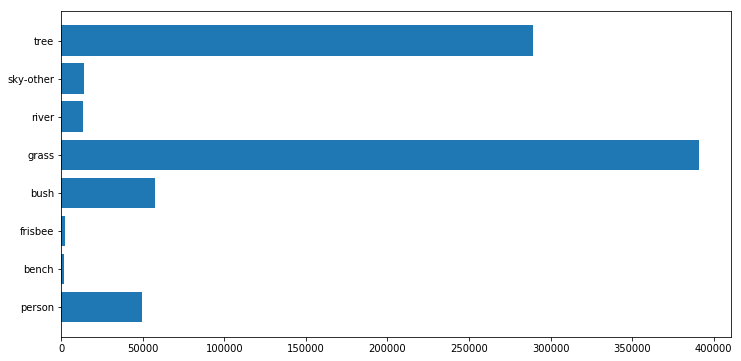

In [1]:
from PIL import Image
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline

## Load the image
img = np.asarray(Image.open("segmentation/semantic.png"))

## Return each pixel count
pixel, counts = np.unique(img, return_counts = True)

## Read the label names, this will give us a dictonary from num (0) -- label_name (person)
labels_dict = {int(i.split()[0]): i.split()[1] for i in open("labels.txt", "r")}

## Collect all the pixel values expect 0 (Pixels that do not belong to any of the other classes, as it is considered as border pixels.)
pixel_labels = [labels_dict[i-1] for i in pixel if i!= 0]

## Collect the pixel counts for each class except boarder class
counts = [counts[num] for num, i in enumerate(pixel) if i!= 0]

## Plot the graph
plt.figure(figsize=(12, 6))
plt.barh(pixel_labels, counts)
plt.show()

In [2]:
pixel_labels

['person', 'bench', 'frisbee', 'bush', 'grass', 'river', 'sky-other', 'tree']

## Task 
**What is the relative percentage pixels occupied by stuff and thing objects in the image. ?**

Instructions to calculate
- Ignore boarder pixels 
- tree, sky-other, river, grass and bush are stuff objects. 
- bench, person, frisbee are thing objects

(a) the objective of performing the task i.e. what will the learner perform and gain out of that task?
When we said 66% of the pixels in the COCO dataset belong to stuff objects, How do we calculate that? In this task we will calculate it for one image. Going further learners can apply this on the entire dataset.

(b) a set of instructions 
- make a list of stuff objects **stuff_object_names** and count of pixels of each stuff object as another list **stuff_object_pixels_count**.
- repeat the same for thing objects **thing_object_names** and **thing_object_pixels_count**
- calculate stuff percentage sum(stuff_object_pixels_count) / (sum(stuff_object_pixels_count) + sum(thing_object_pixels_count))
- calculate thing percentage sum(thing_object_pixels_count) / (sum(stuff_object_pixels_count) + sum(thing_object_pixels_count))

(c) the solution code. 
```python
stuff_object_names = ["tree", "sky-other", "river", "grass", "bush"]
thing_object_names = ["bench", "person", "frisbee"]

stuff_object_pixels_count = [counts[pixel_labels.index(i)] for i in stuff_object_names]
print("stuff_object_names:{}, stuff_object_pixels_count: {}".format(stuff_object_names, stuff_object_pixels_count))

thing_object_pixels_count = [counts[pixel_labels.index(i)] for i in thing_object_names]
print("thing_object_names:{}, thing_object_pixels_count: {}".format(thing_object_names, thing_object_pixels_count))


total_stuff_object_pixels_count = sum(stuff_object_pixels_count)
print("total stuff object pixels count: {}".format(total_stuff_object_pixels_count))

total_thing_object_pixels_count = sum(thing_object_pixels_count)
print("total thing object pixels count: {}".format(total_thing_object_pixels_count))

print("stuff_percentage: {}".format(total_stuff_object_pixels_count/ (total_stuff_object_pixels_count+total_thing_object_pixels_count)))
print("thing_percentage: {}".format(total_thing_object_pixels_count/ (total_stuff_object_pixels_count+total_thing_object_pixels_count)))
```


## 3.2 - Instance Segmentation
Studying things is typically formulated as the task of instance segmentation, where the goal is to detect each object and delineate it with a segmentation mask, respectively. While semantic segmentation fails in calculating how many objects (example cars) are present in a image(image if two cars are overlapping in a image. It is difficult to separate those 2 cars and count them), Instance segmentation will draw a bounding box and a segmentation mask to each and every object thus allowing to separate each object. The below uses cases explains this clearly
-  The kaggle Data science bowl 2018 challege deals with creating an algorithm to automate nucleus detection[Link](https://www.kaggle.com/c/data-science-bowl-2018). As shown in the below diagram, we not only need to find the location of nucleus cell but also separate out each and every cell (so that we can count).
![kaggle data science bowl](../images/nucleas.png)
- Usuall instance segmentation dataset contains an input image (RGB mostly) and the mask for each and every object separately (if there are 10 objects, there will be 10 masks). In the below image, we can use bounding boxes to separate both the humans (2 instances). 

input image             |  Instance image
:-------------------------:|:-------------------------:
![input image](segmentation/input_image.png)  |  ![instance image](segmentation/mask_rcnn_output.png)

## 3.3 - Panoptic segmentation
Can there be a reconciliation between stuff and things? These questions are particularly important given their relevance in real world applications, such as autonomous driving or augmented reality. Datasets like Cityscapes, ADE20K and COCO dataset(with their latest release of panpotic annotations) are especially designed for this. Panoptic segmenation is a unified framework for understanding an image completely. It can detect cars at pixel level and distinguish between different cars, It can separate roads from footpaths etc.

- The dataset contains an input image (RGB mostly), an output mask image which contains the class number for each pixel and the mask for each and every object separately (if there are 10 objects, there will be 10 masks). In the below image we can clearly see that we can distingush between stuff and thing objects. Even within thing objects we can clearly distiguish between different person (different colors assigned).  

| input image             |  Panoptic image |
:-------------------------:|:-------------------------:
![input image](segmentation/input_image.png)  |  ![panoptic image](segmentation/panoptic.png)


### 3.4 Goals in this course
Thought the ultimate goal of the vision community is to make panoptic segmentation feasible, There are several reasons why this is difficult.
- Firstly, It is extremely difficult to label everything in a image.
- Sencond, the networks pipelines will become complex. It will take higher times to train and validate the results.
- There is no need to panoptic segmenation for many uses cases. Also every usecase might not require segmenting each and everything in the image. For example, checkout the things we have discussed in semantic segmenation and instance segmenation. It is unnecessary to make things complicated when we can achieve something very simple. 

Now since we understood when to use which type of segmentation. This session is dedicated towards **semantic segmenation.** Understanding this properly should open roads for other things too.  

## Quiz
**Q1)** Given a image and when asked to findout how many tigers are present in it. Which kind of segmentation would you perform?  
A) Panoptic segmentation  
B) Instance segmentation  
C) Semantic segmentation   
D) Any of the above  

Ans) B) Instance segmentation, since we need to count the number of tigers, there is no need to identify background objects, so no need of panoptic segmentation


**Q2)** Given a satellite image you were asked to identify the the percentage of land occupied by water bodies, trees and buildings? Which kind of segmentation would you perform ?  

A) Panoptic segmentation  
B) Instance segmentation  
C) Semantic segmentation  
D) None of the above     
Ans) C) Sematic segmentation, as we just need to indentify percentage of land occupied for each object.  


**Q3)** Given a satellite image you were asked to identify the percentage of land occupied by water bodies and roads in the image? In addition to that, you were also asked to count the number of cars present on the road? Which kind of segmentation would you perform ?

A) Panoptic segmentation  
B) Instance segmentation  
C) Semantic segmentation  
D) None of the above     
Ans) A) Panoptic segmentation, as we need to count the vechiles and distinguish between water bodies and roads too.    
